# Climate Signal Detection derived from observations only

Because we don't have model data for AIRS spectral radiances, we have to estimate the properties of the timeseries from the incomplete satellite record. This means estimating uncertainty in the variance, and autocorrelation of the timeseries, as well as in the trend itself. Weatherhead (1998) presents a methodology for doing this that were applied accounting for observational uncertainty in Feldman (2011b). I will use these methods (while using the Leroy (2008) autocorrelation term) to estimate the detection of Arctic climate signals in the AIRS record as well in CERES and perhaps surface temperature observations. The goal is to show that May OLR changes can be detected much more quickly using spectral channels in the atmospheric window.

__This script uses pre-processed timeseries from detectiontime_obsonly_preproc.ipynb__

Weatherhead (1998) derives a confidence interval for trend detection based on uncertainty resulting from a short observational record. Let $n_u^*$ be the detection time from a standard method like Weatherhead or Leroy's where an infinite timeseries is used to calculate the properites (variance $\sigma$, autocorrelation $\tau,\phi$, and trend $\omega$) of the variable's response to an external forcing. In the more practical case where this timeseries is finite, $\hat{n}_u^*$ is the detection time. From Weatherhead, a 95% confidence interval on this detection time is given by

$$ (\hat{n}_u^* e^{-B},\hat{n}_u^* e^{B}), $$

where $B$ describes the uncertainty in the variance, autocorrelation, and trend calculated from the finite observed timeseries and is given by

$$ B = \frac{4}{3\sqrt{M}} \sqrt{\frac{1 + \hat{\phi}}{1 - \hat{\phi}}}, $$

where $M$ is the length of the observed record and $\hat{\phi}$ is the lag-1 autocorrelation calculated from this finite record.

Since we are using the Leroy formulation that uses the correlation time $\tau$ instead of $\phi$, we repeat the methods of Weatherhead (applying the $\delta$ method after shifting to the $\log \Delta t$ scale). This approach can be summarized as:  

$$ \tilde{V} \equiv \left( \frac{d \log \Delta t (\tau)}{d \tau} \right)^2 \times Var({\hat{\tau}}), $$

where $Var({\hat{\tau}})$ is the variance of $\tau$ due to the finite observational period, and $\Delta t$ has the form

$$ \Delta t = \left( \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right) ^{1/3} $$

Propagating uncertainty in $\tau_{var}$, we find

$$ \tilde{V}_{\tau_{var}} = \left(\frac{1}{3 \tau_{var}} \right)^2 Var(\tau_{var}) $$

Propagating uncertainty in $m_{est}$, we find

$$ \tilde{V}_{m_{est}} = \left(\frac{2}{3 m_{est}} \right)^2 Var(m_{est}) $$

Still in log-space, 95% confidence intervals for $\log(\Delta t)$ due to uncertainty in $\tau_{var}$ and $m_{est}$ are simply:  

$$ \log{(\Delta t)} (\tau_{var}) \pm 2 \sqrt{\tilde{V}_{\tau_{var}}}, $$

and

$$ \log{(\Delta t)} (m_{est}) \pm 2 \sqrt{\tilde{V}_{m_{est}}}. $$

Moving out of log-space, these expressions become

$$ \Delta t (\tau_{var})e^{\pm 2 \sqrt{\tilde{V}_{\tau_{var}}}} = \Delta t (\tau_{var})e^{\pm B_{\tau_{var}}} $$

$$ \Delta t (m_{est})e^{\pm 2 \sqrt{\tilde{V}_{m_{est}}}} = \Delta t (m_{est})e^{\pm B_{m_{est}}}, $$

where we have

$$ B_{\tau_{var}} = 2 Var(\tau_{var}) / 3 \tau_{var} $$

$$ B_{m_{est}} = 4 Var(m_{est}) / 3 m_{est}. $$

Weatherhead takes $Var(\phi) = (1 - \phi^2) / \sqrt{M}$, where $M$ is the number of observations. I need to find a similar expression for $Var(\tau_{var})$. I can estimate $Var(m_{est})$ directly using the large ensemble if I want but that would be inconsistent with the motivation of these methods.

I need to find expressions for $Var(m_{est})$ and $Var(\tau_{var})$ similar to Weatherhead's. Maybe Jen could help here.

Empirically, let 

$$ Var(\tau_{var}) = \frac{2\tau_{var}^2}{M}, $$

so that the standard deviation of $m_{est}$ is 

$$ \sigma_{\tau_{var}} = \sqrt{\frac{2}{M}} \tau_{var} $$

The numerator (here $2$) effectively describes the number of years at which the uncertainty is equal to the correlation time itself. $2$ is chosen somewhat arbitrarily. We're more interested in this expression performing well for our duration of observations (~18 years). For $M=18$, we get a fractional uncertainty of $1/3$ or $33.3\%$. This seems reasonable but perhaps a little low. Easy to adjust by increasing the numerator if we would like. I can also compare the correlation time at $18$ years to that at $50$ years using the large ensemble, but that would require me to calculate it for each duration, which I haven't done yet. Ultimately, the numerator should depend on the strength and frequency of climate processes that cause variability in the variable of interest.

For $Var(m_{est})$, I can calculate a confidence interval on the slope ($r$) assuming uncorrelated errors and using a Fisher-Z statistic:  

$$ Fisher-Z = \frac{1}{2} \ln{\left( \frac{1 + r}{1 - r} \right)} $$

$$ \mu_Z = \frac{1}{2} \ln{\left( \frac{1 + \rho}{1 - \rho} \right)} $$

$$ \sigma_Z = \frac{1}{\sqrt{N - 3}} $$

The confidence interval in Fisher-Z space is:

$$ Z - t_c \sigma_Z \leq \mu_Z \leq Z + t_c \sigma_Z $$

The confidence interval in slopes space is:

$$ \tanh(Z - t_c \sigma_Z) \leq \tanh(Z) \leq \tanh(Z + t_c \sigma_Z) $$

I will need to account for both sources of uncertainty at the same time. The simplest approach is to assume that these uncertainties are uncorrelated, so that

$$ \log{\left(\Delta t (\tau_{var},m_{est})\right)} \pm 2\sqrt{\left(\tilde{V}_{m_{est}} + \tilde{V}_{\tau_{var}} \right)}. $$

$$ \Delta t (\tau_{var},m_{est}) e^{\pm 2\sqrt{\left(\tilde{V}_{m_{est}} + \tilde{V}_{\tau_{var}} \right)}}. $$

This assumption might not be very valid, since large autocorrelations due to decadal variability are likely to cause changes in the long-term forced slope. I could use the CESM1-LE to test this. If there is a notable covariance between these variables across the various ensemble members, I can easily propagate their crossterm as well.

The framework described above will allow us to estimate detection times with approapriate confidence intervals from observational records without the use of climate model output.

### Do imports

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/spectral_ice/Common/') # is this good or not good. I should reorg.
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    np, xr, plt, sns, os, 
    datetime, gridspec, 
    Iterable, cmaps, glob, copy,
    dask,pd
    )

from functions import (
    add_weights,
    to_png, stats,
    )

from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from functions import tick_function1,tick_function2

## Load Observations

### AIRS Spectral OLR data

In [2]:
airs_proc_dir = '/glade/u/home/jonahshaw/w/obs/AIRS/arc_proc/'
airs_proc_allsky_file = 'olrspectral_70N_87N_wnumtseries.nc'
airs_proc_clrsky_file = 'olrclrspectral_70N_87N_wnumtseries.nc'

In [3]:
airs_allsky_data = xr.open_dataarray('%s/%s' % (airs_proc_dir,airs_proc_allsky_file))
airs_clrsky_data = xr.open_dataarray('%s/%s' % (airs_proc_dir,airs_proc_clrsky_file))

In [4]:
# Add appropriate variable names and combine
airs_allsky_data.name = 'allsky_spectral_OLR'
airs_clrsky_data.name = 'clrsky_spectral_OLR'

airs_spectral_olr_ds = xr.merge([airs_allsky_data,airs_clrsky_data])

### CERES TOA Irradiance data

The most recent data I have goes through 2022/02, but does not include surface values, cloud radiative forcing, or total-area cloud-cleared values. I think this is ok. If I need this data later, it is available through 2021/11.

In [5]:
ceres_data_dir = '/glade/u/home/jonahshaw/w/obs/CERES/arc_proc/'
ceres_arctseries_file = 'CERES_EBAF4.1_TOAvarsonly_200003_202202_ArcticTimeSeries.nc'

In [6]:
ceres_arctseries_ds = xr.open_dataset('%s/%s' % (ceres_data_dir,ceres_arctseries_file))

### Load Berkeley BEST data

Berkeley Earth Surface Temperatures (BEST).

In [7]:
best_path = '/glade/work/jonahshaw/obs/BEST/'
best_arctseries_file = 'BESTTEMP_185001_202112_ArcticTimeSeries.nc'

In [8]:
besttemp_arctseries_ds = xr.open_dataarray('%s/%s' % (best_path,best_arctseries_file))
besttemp_arctseries_ds.name = 'TS_BESTTEMP'

### Load GISStemp data

In [9]:
gisstemp_path = '/glade/work/jonahshaw/obs/GISTEMP/'
gisstemp_arctseriesfile = 'GISSTEMP_200001_202202_ArcticTimeSeries.nc'

In [10]:
gisstemp_arctseries_ds = xr.open_dataarray('%s/%s' % (gisstemp_path,gisstemp_arctseriesfile))
gisstemp_arctseries_ds.name = 'TS_GISSTEMP'

## Perform trend detection analysis

Pick a common time period shared by all observations. AIRS has the shortest record (2002/09 - 2021/03, 223 months or 18 years + 5 months). This will mean 18 means for annual analysis and 18 or 19 years for monthly analysis. Hopefully we'll be able to get the AIRS SOLR through 2021 at some point...

In [11]:
time_min = '2002-09-01' #airs_spectral_olr_ds.time.min()
time_max = '2021-03-31' #airs_spectral_olr_ds.time.max()

In [12]:
airs_spectral_olr_tsel = airs_spectral_olr_ds.sel(time=slice(time_min,time_max))
ceres_toa_tsel         = ceres_arctseries_ds.sel(time=slice(time_min,time_max))
besttemp_ts_tsel       = besttemp_arctseries_ds.sel(time=slice(time_min,time_max))
gisstemp_ts_tsel       = gisstemp_arctseries_ds.sel(time=slice(time_min,time_max))

### Define functions for trend analysis

In [13]:
# Define a function for standardizing data to be used before calculating an autocorrelation
def standardize(data,testing=False,drop_nans=False):
    ''' Standardize the data. ## I need to remove slope here too.'''
    
    # if data.std()==0: # edge case that the standard deviation is zero
    if np.isclose(data.std(),0,atol=1e-5): # edge case that the standard deviation is zero
        data_std = (data - data.mean())
        np.testing.assert_allclose(data_std.mean(),0,atol=1e-5)
        return data_std
    else:
        data_std = (data - data.mean()) / data.std()
    
    if testing:
        print(data)
        print(data_std)
    
    try:
        np.testing.assert_allclose(data_std.mean(),0,atol=1e-5)
        np.testing.assert_allclose(data_std.std(),1,atol=1e-5)
    except:
        print(data_std[np.isnan(data_std)])
        print(data_std.nanmean())
        print(data_std.nanstd())
        raise AssertionError()
        
    # drop nans
    if drop_nans:
        data_std = data_std.dropna(dim=data_std.dims[0])
    
    return data_std

In [14]:
def linear_polyfit(ds,dim='time.year'):
    '''
    Simple wrapped for xarray's polyfit function because I couldn't figure out how to pass arguments...
    allens_all_tseries_preproc.groupby('time.month').map(xr.Dataset.polyfit,args=('time',1)) # this should work if you use xr.DataArray?
    '''
    # ds['time'] = ds[dim] # reassign the time coordinate so that the polyfit gets units right
    ds['time'] = ds['time.year'] # reassign the time coordinate so that the polyfit gets units right, this is the old code
    
    return ds.polyfit(dim='time',deg=1)

In [15]:
def calc_tauvar(autocorrelation_data,max_lag=100,verbose=True):
    ''' 
    The Leroy paper notes that significant autocorrelation is unlikely to occur for lags greater than a few years, 
    motivating us to truncate the autocorrelation at some lag where noise starts to dominate. We need to have a method 
    to do this however. Since the "noise" is not actually centered about zero, I'll sum over the autocorrelation 
    function and pick tau as the maximum value. This might lead to tau values slightly enhanced by noise, and is 
    perhaps conservative, but I think it's probably the safest strategy.
    '''
    
    midpoint = len(autocorrelation_data)//2 # index for the midpoint of the autocorrelation data
    
    try:
        np.testing.assert_almost_equal(autocorrelation_data[midpoint],1,decimal=5) # This point should be 1 if the autocorrelation is formatted correctly and normalized
    except:
        if verbose:
            print("Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.")
        return np.nan
    
    tau_summer = [] # array containing tau as a function of lags considered
    lags = [] # array containing the lags tested (reference)

    for lag in range(1,max_lag+1): # iterate over possible lags

        pointsabout = autocorrelation_data[midpoint-lag:midpoint+1+lag] # get all points within the lag for the autocorrelation function
        test_tau = np.sum(pointsabout) 

        tau_summer.append(test_tau)
        lags.append(lag)
    
    max_tau = np.max(tau_summer)
    
    if verbose:
        print('Maximum Tau of %.2f found at lag %d.' % (max_tau,lags[np.argmax(tau_summer)]))
    
    return max_tau

In [16]:
def calc_autocorr(data):
        
    # standardize the data
    data_std = standardize(data,drop_nans=True) # Standardize the timeseries so the autocorrelation has correct units
    autocorr = np.correlate(data_std,data_std,mode='same') / len(data_std)
    
    return autocorr

def calc_lag1_autocorr(data):
    
    autocorr = calc_autocorr(data)
    
    _lag1_index = len(autocorr) // 2 + 1 # The lag-1 autocorrelation is just off the center of the autocorrelation function, get this index
    _lag1_autocorr = autocorr[_lag1_index] # Get the lag-1 autocorrelation
    
    return xr.DataArray(_lag1_autocorr) # convert back to a dataarray object so xarray can try to concatenate

def calc_tauvar_wrapper(data,**kwargs):
    
    return xr.DataArray(calc_tauvar(calc_autocorr(data),verbose=False))

In [27]:
def calc_slopes_by_dur(data,ann_tsel,durations):
    '''Wrapper for calculating slopes for different durations'''
    
    if type(data) == xr.core.dataset.Dataset:
        return __calc_slopes_by_dur_DATASET(data,ann_tsel,durations)
    elif type(data) == xr.core.dataarray.DataArray:
        return __calc_slopes_by_dur_DATAARRAY(data,ann_tsel,durations)
    else:
        print('First argument must be a xr.core.dataset.Dataset or xr.core.dataarray.DataArray object.')
        return None

        
def __calc_slopes_by_dur_DATASET(data,ann_tsel,durations,calc_detrended=True):
    
    annavg_slopes_dict  = {}
    monthly_slopes_dict = {}

    if calc_detrended:
        annavg_detrend_dict  = {}
        monthly_detrend_dict = {}
            
    for _var in data.data_vars:    
        ens_tseries = data[_var] # select your variable

        # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
        ens_tseries_ann = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
        ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)

        lens_slopes_dict = {}
        lens_slopes_monthly_dict = {}
        
        if calc_detrended:
            lens_detrend_dict = {}
            lens_detrend_monthly_dict = {}
        
        for _dur in durations: # iterate over possible detection durations 
            tseries_dur_subset = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
            tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

            _lens_polyfit = tseries_dur_subset.polyfit(dim='year',deg=1) # take a linear fit
            _lens_slopes = _lens_polyfit['polyfit_coefficients'] # pull out the slope from the linear fit

            _lens_polyfit_monthly = tseries_dur_monthly_subset.groupby('time.month').map(linear_polyfit)
            _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients']

            # Add a 'duration' coordinate
            _lens_slopes = _lens_slopes.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
            _lens_slopes_monthly = _lens_slopes_monthly.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
            
            lens_slopes_dict[_dur] = _lens_slopes # save slopes in an inner dictionary
            lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly
                        
            ###### Calculate detrended data
            if calc_detrended:
                _linear_tseries_ann     = _lens_slopes.sel(degree=1)*tseries_dur_subset['year'] + _lens_slopes.sel(degree=0)
            
                _detrended_tseries_ann     = _linear_tseries_ann - tseries_dur_subset.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)            
                _detrended_tseries_monthly = tseries_dur_monthly_subset.groupby('time.month').map(monthly_detrend_helper,coeffs=_lens_slopes_monthly)

                _detrended_tseries_ann.name = _var
                _detrended_tseries_monthly.name = _var

                lens_detrend_dict[_dur]         = _detrended_tseries_ann
                lens_detrend_monthly_dict[_dur] = _detrended_tseries_monthly

        # combine the data along the new 'duration' dimension
        _temp_slopes_da = xr.merge(list(lens_slopes_dict.values()))['polyfit_coefficients']
        _temp_slopes_da.name = _var
        
        _temp_slopes_monthly_da = xr.merge(list(lens_slopes_monthly_dict.values()))['polyfit_coefficients']
        _temp_slopes_monthly_da.name = _var

        annavg_slopes_dict[_var] = _temp_slopes_da
        monthly_slopes_dict[_var] = _temp_slopes_monthly_da
        
        del lens_slopes_dict,lens_slopes_monthly_dict
        
        if calc_detrended:
            _temp_detrend_da = xr.merge(list(lens_detrend_dict.values()))
            _temp_detrend_monthly_da = xr.merge(list(lens_detrend_monthly_dict.values()))
            
            annavg_detrend_dict[_var]  = _temp_detrend_da
            monthly_detrend_dict[_var] = _temp_detrend_monthly_da
            
            del lens_detrend_dict,lens_detrend_monthly_dict

    data_slopes_dur_ds = xr.merge(annavg_slopes_dict.values()).sel(degree=1).drop('degree')
    data_slopes_monthly_dur_ds = xr.merge(monthly_slopes_dict.values()).sel(degree=1).drop('degree')
        
    if calc_detrended:
        data_detrend_dur_ds = xr.merge(annavg_detrend_dict.values())
        data_detrend_monthly_dur_ds = xr.merge(monthly_detrend_dict.values())

        del annavg_slopes_dict,monthly_slopes_dict,annavg_detrend_dict,monthly_detrend_dict
        return data_slopes_dur_ds,data_slopes_monthly_dur_ds,data_detrend_dur_ds,data_detrend_monthly_dur_ds
        
    else:
        del annavg_slopes_dict,monthly_slopes_dict
        return data_slopes_dur_ds,data_slopes_monthly_dur_ds

### Doesn't work but maybe one day will!
# def __calc_slopes_by_dur_DATASET(data,ann_tsel,durations,calc_detrended=True):
#     return data.map(__calc_slopes_by_dur_DATAARRAY,ann_tsel=ann_tsel,durations=durations,calc_detrended=calc_detrended)
    
def __calc_slopes_by_dur_DATAARRAY(data,ann_tsel,durations,calc_detrended=True):
    
    ens_tseries = data # select your variable
    
    # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
    ens_tseries_ann = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
    ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)
    
    lens_slopes_dict = {}
    lens_slopes_monthly_dict = {}
    
    if calc_detrended:
        lens_detrend_dict = {}
        lens_detrend_monthly_dict = {}
        
    for _dur in durations: # iterate over possible detection durations 
        tseries_dur_subset = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
        tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

        _lens_polyfit = tseries_dur_subset.polyfit(dim='year',deg=1) # take a linear fit
        _lens_slopes = _lens_polyfit['polyfit_coefficients'] # pull out the slope from the linear fit

        _lens_polyfit_monthly = tseries_dur_monthly_subset.groupby('time.month').map(linear_polyfit)
        _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients']

        # Add a 'duration' coordinate
        _lens_slopes = _lens_slopes.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
        _lens_slopes_monthly = _lens_slopes_monthly.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)

        # save slopes in an inner dictionary
        lens_slopes_dict[_dur] = _lens_slopes
        lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly
        
        ###### Calculate detrended data
        if calc_detrended:
            _linear_tseries_ann     = _lens_slopes.sel(degree=1)*tseries_dur_subset['year'] + _lens_slopes.sel(degree=0)
            
            _detrended_tseries_ann     = _linear_tseries_ann - tseries_dur_subset.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)            
            _detrended_tseries_monthly = tseries_dur_monthly_subset.groupby('time.month').map(monthly_detrend_helper,coeffs=_lens_slopes_monthly)
                        
            _detrended_tseries_ann.name = data.name
            _detrended_tseries_monthly.name = data.name
            
            lens_detrend_dict[_dur]         = _detrended_tseries_ann
            lens_detrend_monthly_dict[_dur] = _detrended_tseries_monthly

    # combine the data along the new 'duration' dimension
    _temp_slopes_da = xr.merge(list(lens_slopes_dict.values()))['polyfit_coefficients']
    _temp_slopes_da.name = data.name

    _temp_slopes_monthly_da = xr.merge(list(lens_slopes_monthly_dict.values()))['polyfit_coefficients']
    _temp_slopes_monthly_da.name = data.name
    
    _temp_slopes_da = _temp_slopes_da.sel(degree=1).drop('degree')
    _temp_slopes_monthly_da = _temp_slopes_monthly_da.sel(degree=1).drop('degree')

    if calc_detrended:
        _temp_detrend_da = xr.merge(list(lens_detrend_dict.values()))
        _temp_detrend_monthly_da = xr.merge(list(lens_detrend_monthly_dict.values()))
        
        del lens_slopes_dict,lens_slopes_monthly_dict,lens_detrend_dict,lens_detrend_monthly_dict
        return _temp_slopes_da,_temp_slopes_monthly_da,_temp_detrend_da,_temp_detrend_monthly_da
        
    else:
        del lens_slopes_dict,lens_slopes_monthly_dict
        return _temp_slopes_da,_temp_slopes_monthly_da    
    
def monthly_detrend_helper(tseries,coeffs=None):
    '''
    Helper function (poorly coded) to detrend monthly timeseries if given the linear fit coefficients.
    '''
    # if not coeffs:
    #     print('need to pass coefficients for the linear fit')
    #     return None
    
    month = tseries[0]['time.month']
    years = tseries['time.year']
    
    coeff0 = coeffs.sel(month=month,degree=0)
    coeff1 = coeffs.sel(month=month,degree=1)
    
    proxy_tseries = coeff1*years + coeff0 # y = mx+b
    
    _detrended_tseries_monthly = proxy_tseries - tseries #.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
    _detrended_tseries_monthly = _detrended_tseries_monthly.groupby('time.year').mean('time') # shift from the full 'time' coordinate to a 'year' coordinate

    # print(_detrended_tseries_monthly)
    
    return _detrended_tseries_monthly

In [18]:
def calc_tauvar_by_dur(data,ann_tsel,durations):
    '''Wrapper for calculating correlation times for different durations'''
    
    if type(data) == xr.core.dataset.Dataset:
        return __calc_tauvar_by_dur_DATASET(data,ann_tsel,durations)
    elif type(data) == xr.core.dataarray.DataArray:
        return __calc_tauvar_by_dur_DATAARRAY(data,ann_tsel,durations)
    else:
        print('First argument must be a xr.core.dataset.Dataset or xr.core.dataarray.DataArray object.')

        
def __calc_tauvar_by_dur_DATASET(data,ann_tsel,durations):
    
    annavg_tauvar_dict  = {}
    monthly_tauvar_dict = {}
    
    for _var in data.data_vars:
        print(_var)
        ens_tseries = data[_var] # select your variable

        # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
        ens_tseries_ann     = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
        ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)

        tauvar_dict = {}
        tauvar_monthly_dict = {}
        for _dur in durations: # iterate over possible detection durations 
            tseries_dur_subset         = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
            tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

            # Handle higher dimensional timeseries fluently (i.e. the AIRS sOLR data is indexed by both time and wavenumber (wnum))
            non_time_dims = list(tseries_dur_subset.dims)
            non_time_dims.remove('year') # drop the time dim
            if len(non_time_dims)==0:
                annual_tau_var  = calc_tauvar_wrapper(tseries_dur_subset)
                monthly_tau_var = tseries_dur_monthly_subset.groupby('time.month').map(calc_tauvar_wrapper)
            else:
                annual_data_stacked = tseries_dur_subset.stack(temp_index=non_time_dims)
                annual_tau_var = annual_data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()

                # this bullshit roundabout method is the bastard child of this shittastic stackoverflow page: 
                # https://stackoverflow.com/questions/63082479/how-to-replace-the-current-dimension-of-an-xarray-object-with-two-new-ones
                # We want to reshape the wavenumber X time structure into a wavenumber X month X year structure, but xarray doesn't want to go easily

                # Add new year and month coordinates
                tseries_dur_monthly_subset_newcoords = tseries_dur_monthly_subset.assign_coords(
                    {
                        'year' :tseries_dur_monthly_subset['time.year'],
                        'month':tseries_dur_monthly_subset['time.month'],
                    }
                )

                # Destroy all hierarchy in the data by sending to pandas and hard-reseting the indices.
                # Finally, set the indices to our chosen year X month X wavenumber and return to xarray
                tseries_dur_monthly_subset_reorg = tseries_dur_monthly_subset_newcoords.to_dataframe().reset_index().set_index(['year','month','wnum']).to_xarray() 

                non_year_dims = list(tseries_dur_monthly_subset_reorg.dims)
                non_year_dims.remove('year') # drop the time dim

                monthly_data_stacked = tseries_dur_monthly_subset_reorg.stack(temp_index=non_year_dims)
                monthly_data_stacked = monthly_data_stacked[_var] #.to_array()
                monthly_tau_var = monthly_data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()
            
            # Add a 'duration' coordinate
            annual_tau_var  = annual_tau_var.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
            monthly_tau_var = monthly_tau_var.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)

            annual_tau_var.name  = _var
            monthly_tau_var.name = _var
            
            tauvar_dict[_dur] = annual_tau_var # save slopes in an inner dictionary
            tauvar_monthly_dict[_dur] = monthly_tau_var
            
        # combine the data along the new 'duration' dimension
        _temp_tauvar_da = xr.merge(list(tauvar_dict.values()))

        _temp_tauvar_monthly_da = xr.merge(list(tauvar_monthly_dict.values()))
        
        del tauvar_dict,tauvar_monthly_dict
        
        annavg_tauvar_dict[_var] = _temp_tauvar_da
        monthly_tauvar_dict[_var] = _temp_tauvar_monthly_da

    data_tauvar_dur_ds = xr.merge(annavg_tauvar_dict.values())
    data_tauvar_monthly_dur_ds = xr.merge(monthly_tauvar_dict.values())

    del annavg_tauvar_dict,monthly_tauvar_dict
    return data_tauvar_dur_ds,data_tauvar_monthly_dur_ds


def __calc_tauvar_by_dur_DATAARRAY(data,ann_tsel,durations):
        
    ens_tseries = data
    _var = data.name

    # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
    ens_tseries_ann = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
    ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)

    tauvar_dict = {}
    tauvar_monthly_dict = {}
    for _dur in durations: # iterate over possible detection durations 
        tseries_dur_subset         = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
        tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

        # Handle higher dimensional timeseries fluently (i.e. the AIRS sOLR data is indexed by both time and wavenumber (wnum))
        non_time_dims = list(tseries_dur_subset.dims)
        non_time_dims.remove('year') # drop the time dim
        if len(non_time_dims)==0:
            annual_tau_var  = calc_tauvar_wrapper(tseries_dur_subset)
            monthly_tau_var = tseries_dur_monthly_subset.groupby('time.month').map(calc_tauvar_wrapper)
        else:
            annual_data_stacked = tseries_dur_subset.stack(temp_index=non_time_dims)
            annual_tau_var = annual_data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()

            # this bullshit roundabout method is the bastard child of this shittastic stackoverflow page: 
            # https://stackoverflow.com/questions/63082479/how-to-replace-the-current-dimension-of-an-xarray-object-with-two-new-ones
            # We want to reshape the wavenumber X time structure into a wavenumber X month X year structure, but xarray doesn't want to go easily

            # Add new year and month coordinates
            tseries_dur_monthly_subset_newcoords = tseries_dur_monthly_subset.assign_coords(
                {
                    'year' :tseries_dur_monthly_subset['time.year'],
                    'month':tseries_dur_monthly_subset['time.month'],
                }
            )

            # Destroy all hierarchy in the data by sending to pandas and hard-reseting the indices.
            # Finally, set the indices to our chosen year X month X wavenumber and return to xarray
            tseries_dur_monthly_subset_reorg = tseries_dur_monthly_subset_newcoords.to_dataframe().reset_index().set_index(['year','month','wnum']).to_xarray() 

            non_year_dims = list(tseries_dur_monthly_subset_reorg.dims)
            non_year_dims.remove('year') # drop the time dim

            monthly_data_stacked = tseries_dur_monthly_subset_reorg.stack(temp_index=non_year_dims)
            monthly_tau_var = monthly_data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()

        # Add a 'duration' coordinate
        annual_tau_var  = annual_tau_var.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
        monthly_tau_var = monthly_tau_var.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)

        annual_tau_var.name  = _var
        monthly_tau_var.name = _var

        tauvar_dict[_dur] = annual_tau_var # save slopes in an inner dictionary
        tauvar_monthly_dict[_dur] = monthly_tau_var

    # combine the data along the new 'duration' dimension
    _temp_tauvar_da = xr.merge(list(tauvar_dict.values()))

    _temp_tauvar_monthly_da = xr.merge(list(tauvar_monthly_dict.values()))

    del tauvar_dict,tauvar_monthly_dict
    return _temp_tauvar_da,_temp_tauvar_monthly_da

In [19]:
def calc_stddev_by_dur(data,ann_tsel,durations):
    '''Wrapper for calculating slopes for different durations'''
    
    if type(data) == xr.core.dataset.Dataset:
        return __calc_stddev_by_dur_DATASET(data,ann_tsel,durations)
    elif type(data) == xr.core.dataarray.DataArray:
        return __calc_stddev_by_dur_DATAARRAY(data,ann_tsel,durations)
    else:
        print('First argument must be a xr.core.dataset.Dataset or xr.core.dataarray.DataArray object.')

        
def __calc_stddev_by_dur_DATASET(data,ann_tsel,durations):
    
    annavg_stddev_dict  = {}
    monthly_stddev_dict = {}
    
    for _var in data.data_vars:
        print(_var)
        ens_tseries = data[_var] # select your variable

        # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
        ens_tseries_ann     = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
        ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)

        stddev_dict = {}
        stddev_monthly_dict = {}
        for _dur in durations: # iterate over possible detection durations 
            tseries_dur_subset         = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
            tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

            annual_stddev  = tseries_dur_subset.std(dim='year')
            monthly_stddev = tseries_dur_monthly_subset.groupby('time.month').std(dim='time')

            # Add a 'duration' coordinate
            annual_stddev  = annual_stddev.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
            monthly_stddev = monthly_stddev.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)

            annual_stddev.name  = _var
            monthly_stddev.name = _var
            
            stddev_dict[_dur] = annual_stddev # save slopes in an inner dictionary
            stddev_monthly_dict[_dur] = monthly_stddev
            
        # combine the data along the new 'duration' dimension
        _temp_stddev_da = xr.merge(list(stddev_dict.values()))

        _temp_stddev_monthly_da = xr.merge(list(stddev_monthly_dict.values()))
        
        del stddev_dict,stddev_monthly_dict
        
        annavg_stddev_dict[_var] = _temp_stddev_da
        monthly_stddev_dict[_var] = _temp_stddev_monthly_da

    data_stddev_dur_ds = xr.merge(annavg_stddev_dict.values())
    data_stddev_monthly_dur_ds = xr.merge(monthly_stddev_dict.values())

    del annavg_stddev_dict,monthly_stddev_dict
    return data_stddev_dur_ds,data_stddev_monthly_dur_ds

    # return data.map(__calc_stddev_by_dur_DATAARRAY,ann_tsel=ann_tsel,durations=durations)


def __calc_stddev_by_dur_DATAARRAY(data,ann_tsel,durations):
        
    ens_tseries = data
    _var = data.name

    # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
    ens_tseries_ann = ens_tseries.sel(time=ann_tsel).groupby('time.year').mean('time')
    ens_tseries_monthly = ens_tseries.sel(time=ann_tsel)

    stddev_dict = {}
    stddev_monthly_dict = {}
    for _dur in durations: # iterate over possible detection durations 
        tseries_dur_subset         = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
        tseries_dur_monthly_subset = ens_tseries_monthly.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

        annual_stddev  = tseries_dur_subset.std(dim='year')
        monthly_stddev = tseries_dur_monthly_subset.groupby('time.month').std(dim='time')

        # Add a 'duration' coordinate
        annual_stddev  = annual_stddev.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)
        monthly_stddev = monthly_stddev.assign_coords({'duration':_dur}).expand_dims('duration',axis=-1)

        annual_stddev.name  = _var
        monthly_stddev.name = _var

        stddev_dict[_dur] = annual_stddev # save slopes in an inner dictionary
        stddev_monthly_dict[_dur] = monthly_stddev

    # combine the data along the new 'duration' dimension
    _temp_stddev_da = xr.merge(list(stddev_dict.values()))

    _temp_stddev_monthly_da = xr.merge(list(stddev_monthly_dict.values()))

    del stddev_dict,stddev_monthly_dict
    return _temp_stddev_da,_temp_stddev_monthly_da

In [20]:
def calc_vartauvar_by_dur(data):
    '''
    Calculate the variance of 
$$ Var(\tau_{var}) = \frac{2\tau_{var}^2}{M}, $$
    
    '''
    return 2*data**2 / data['duration']

Compute trends at each timestep and detrended data at each timestep.

In [21]:
min_duration = 2
max_duration = 19

durations = np.arange(min_duration,max_duration+1)

In [22]:
ceres_toa_slopes_dur_ds,ceres_toa_slopes_monthly_dur_ds,ceres_toa_detrend_dur_ds,ceres_toa_detrend_monthly_dur_ds = calc_slopes_by_dur(ceres_toa_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

In [23]:
airs_spectral_olr_slopes_dur_ds,airs_spectral_olr_slopes_monthly_dur_ds,airs_spectral_olr_detrend_dur_ds,airs_spectral_olr_detrend_monthly_dur_ds = calc_slopes_by_dur(airs_spectral_olr_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

In [28]:
gisstemp_ts_slopes_dur_ds,gisstemp_ts_slopes_monthly_dur_ds,gisstemp_ts_detrend_dur_ds,gisstemp_ts_detrend_monthly_dur_ds = calc_slopes_by_dur(gisstemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

In [31]:
besttemp_ts_slopes_dur_ds,besttemp_ts_slopes_monthly_dur_ds,besttemp_ts_detrend_dur_ds,besttemp_ts_detrend_monthly_dur_ds = calc_slopes_by_dur(besttemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

This works, but because the years are mismatched some of the slopes are repeated for the few two durations. This is fine, but I'll need to remember that the monthly values are calculated with different year ranges.

Now, calculate $\tau_{var}$ for our variables.

__Old approach does not use detrended data.__

Detrending filters out autocorrelation due to low frequency variability, imposing a nyquist cutoff for $f < 1 / 2T$. This removes the forced trend, but also any unforced low-frequency trends present as well. It would be better to estimate $\tau_{var}$ using a long-term unforced simulation!

In [ ]:
# ceres_toa_tauvar_ann,ceres_toa_tauvar_monthly = calc_tauvar_by_dur(ceres_toa_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# airs_spectral_olr_tauvar_ann,airs_spectral_olr_tauvar_monthly = calc_tauvar_by_dur(airs_spectral_olr_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# gisstemp_ts_tauvar_ann,gisstemp_ts_tauvar_monthly = calc_tauvar_by_dur(gisstemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# besttemp_ts_tauvar_ann,besttemp_ts_tauvar_monthly = calc_tauvar_by_dur(besttemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

__New approach uses detrended data.__

This filters out low frequency correlations, but is probably still better for this purpose.

In [32]:
# we just want a function that will operate along the year axis
def calc_tauvar_no_dur(data):

    non_time_dims = list(data.dims)
    non_time_dims.remove('year') # drop the time dim

    data_stacked = data.stack(temp_index=non_time_dims)
    out_tau_var = data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()
    
    return out_tau_var

In [33]:
ceres_toa_tauvar_ann     = ceres_toa_detrend_dur_ds.map(calc_tauvar_no_dur)
ceres_toa_tauvar_monthly = ceres_toa_detrend_monthly_dur_ds.map(calc_tauvar_no_dur)

In [34]:
airs_spectral_olr_tauvar_ann     = airs_spectral_olr_detrend_dur_ds.map(calc_tauvar_no_dur)
airs_spectral_olr_tauvar_monthly = airs_spectral_olr_detrend_monthly_dur_ds.map(calc_tauvar_no_dur)

In [35]:
gisstemp_ts_tauvar_ann     = gisstemp_ts_detrend_dur_ds.map(calc_tauvar_no_dur)
gisstemp_ts_tauvar_monthly = gisstemp_ts_detrend_monthly_dur_ds.map(calc_tauvar_no_dur)

In [36]:
besttemp_ts_tauvar_ann     = besttemp_ts_detrend_dur_ds.map(calc_tauvar_no_dur)
besttemp_ts_tauvar_monthly = besttemp_ts_detrend_monthly_dur_ds.map(calc_tauvar_no_dur)

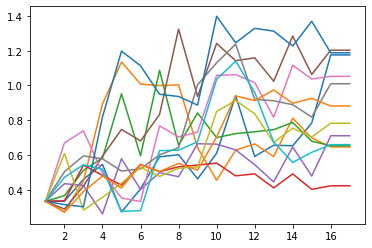

In [37]:
plt.plot(gisstemp_ts_tauvar_monthly['TS_GISSTEMP'].T)

The autocorrelation time is still increasing, even after nearly 20 years. This indicates that the noise is not an AR(1) process, and assuming so is a bad idea.

Calculate $Var(\tau_{var})$

$$ Var(\tau_{var}) = \frac{2\tau_{var}^2}{M}, $$


In [38]:
ceres_toa_vartauvar_ann = calc_vartauvar_by_dur(ceres_toa_tauvar_ann)
ceres_toa_vartauvar_monthly = calc_vartauvar_by_dur(ceres_toa_tauvar_monthly)

airs_spectral_olr_vartauvar_ann = calc_vartauvar_by_dur(airs_spectral_olr_tauvar_ann)
airs_spectral_olr_vartauvar_monthly = calc_vartauvar_by_dur(airs_spectral_olr_tauvar_monthly)

gisstemp_ts_vartauvar_ann = calc_vartauvar_by_dur(gisstemp_ts_tauvar_ann)
gisstemp_ts_vartauvar_monthly = calc_vartauvar_by_dur(gisstemp_ts_tauvar_monthly)

besttemp_ts_vartauvar_ann = calc_vartauvar_by_dur(besttemp_ts_tauvar_ann)
besttemp_ts_vartauvar_monthly = calc_vartauvar_by_dur(besttemp_ts_tauvar_monthly)

Finally, calculate $\sigma_{var}$

__Old version with non-detrended data.__

In [ ]:
# ceres_toa_stddev_ann,ceres_toa_stddev_monthly = calc_stddev_by_dur(ceres_toa_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# airs_spectral_olr_stddev_ann,airs_spectral_olr_stddev_monthly = calc_stddev_by_dur(airs_spectral_olr_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# gisstemp_ts_stddev_ann,gisstemp_ts_stddev_monthly = calc_stddev_by_dur(gisstemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

# besttemp_ts_stddev_ann,besttemp_ts_stddev_monthly = calc_stddev_by_dur(besttemp_ts_tsel,slice('2003-01-01','2020-12-31'),durations=durations)

__New version with detrended data.__

In [39]:
ceres_toa_stddev_ann = ceres_toa_detrend_dur_ds.std(dim='year')
ceres_toa_stddev_monthly = ceres_toa_detrend_monthly_dur_ds.std(dim='year')

In [40]:
airs_spectral_olr_stddev_ann = airs_spectral_olr_detrend_dur_ds.std(dim='year')
airs_spectral_olr_stddev_monthly = airs_spectral_olr_detrend_monthly_dur_ds.std(dim='year')

In [41]:
gisstemp_ts_stddev_ann = gisstemp_ts_detrend_dur_ds.std(dim='year')
gisstemp_ts_stddev_monthly = gisstemp_ts_detrend_monthly_dur_ds.std(dim='year')

In [42]:
besttemp_ts_stddev_ann = besttemp_ts_detrend_dur_ds.std(dim='year')
besttemp_ts_stddev_monthly = besttemp_ts_detrend_monthly_dur_ds.std(dim='year')

### Calculate the detection time

First, I'll follow the methods of Feldman et al. (2011b).

$$ \hat{n}_{U+I} = \min \left(e^B \left[\frac{3.96\hat{\sigma}_e(t)}{|\hat{\omega}_0(t)|(1-\hat{\phi}(t))} \right]^{2/3} (1+f^2)^{1/3} < t \right) $$

with my methods and ignoring observational uncertainty for now, this becomes

$$ \hat{\Delta t} = \min \left(e^{2\sqrt{Var(\tau_{var})}} \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right] ^{1/3} < t \right) $$

Compute the Shaw time-to-detection values for the annual data.

In [61]:
def detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds):

    s = 2

    # first exponential term
    unc_term = np.exp(2*np.sqrt(vartauvar_ds)) 

    # Leroy (2008) time-to-detection term
    detection_term = (12*s**2 * stddev_ds**2 * tauvar_ds * np.abs(slopes_ds)**-2)**(1/3)

    DeltaT_ds = unc_term * detection_term

    detect_DeltaT_ds = DeltaT_ds < DeltaT_ds.duration
    # We first take the duration and broadcast it across variables and months.
    duration_broad = detect_DeltaT_ds.duration.broadcast_like(detect_DeltaT_ds)
    # Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections).
    emergence_DeltaT_ds = 1 + duration_broad.where(~detect_DeltaT_ds).max(dim='duration')
    # Fill areas where emergence did not occur with nans
    emergence_DeltaT_ds = xr.where(emergence_DeltaT_ds > duration_broad.max(),np.nan,emergence_DeltaT_ds)
    
    return emergence_DeltaT_ds,detect_DeltaT_ds,DeltaT_ds,detection_term,unc_term

# ceres_toa_slopes_dur_ds

### Calculate the emergence time, finally!

__CERES TOA Obs.__

In [208]:
slopes_ds    = ceres_toa_slopes_dur_ds
tauvar_ds    = ceres_toa_tauvar_ann
stddev_ds    = ceres_toa_stddev_ann
vartauvar_ds = ceres_toa_vartauvar_ann

ceres_emerge_ann,ceres_detectbool_ann,ceres_DeltaT_ann,ceres_detect_ann,ceres_unc_ann = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

In [209]:
slopes_ds    = ceres_toa_slopes_monthly_dur_ds
tauvar_ds    = ceres_toa_tauvar_monthly
stddev_ds    = ceres_toa_stddev_monthly
vartauvar_ds = ceres_toa_vartauvar_monthly

ceres_emerge_monthly,ceres_detectbool_monthly,ceres_DeltaT_monthly,ceres_detect_monthly,ceres_unc_monthly = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

__AIRS Spectral OLR Obs.__

In [78]:
slopes_ds    = airs_spectral_olr_slopes_dur_ds
tauvar_ds    = airs_spectral_olr_tauvar_ann
stddev_ds    = airs_spectral_olr_stddev_ann
vartauvar_ds = airs_spectral_olr_vartauvar_ann

solr_emerge_ann,solr_detectbool_ann,solr_DeltaT_ann,solr_detect_ann,solr_unc_ann = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

In [79]:
slopes_ds    = airs_spectral_olr_slopes_monthly_dur_ds
tauvar_ds    = airs_spectral_olr_tauvar_monthly
stddev_ds    = airs_spectral_olr_stddev_monthly
vartauvar_ds = airs_spectral_olr_vartauvar_monthly

solr_emerge_monthly,solr_detectbool_monthly,solr_DeltaT_monthly,solr_detect_monthly,solr_unc_monthly = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

__BestTemp Temperature Obs.__

In [203]:
slopes_ds    = besttemp_ts_slopes_dur_ds
tauvar_ds    = besttemp_ts_tauvar_ann
stddev_ds    = besttemp_ts_stddev_ann
vartauvar_ds = besttemp_ts_vartauvar_ann

besttemp_emerge_ann,besttemp_detectbool_ann,besttemp_DeltaT_ann,besttemp_detect_ann,besttemp_unc_ann = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

In [204]:
slopes_ds    = besttemp_ts_slopes_monthly_dur_ds
tauvar_ds    = besttemp_ts_tauvar_monthly
stddev_ds    = besttemp_ts_stddev_monthly
vartauvar_ds = besttemp_ts_vartauvar_monthly

besttemp_emerge_monthly,besttemp_detectbool_monthly,besttemp_DeltaT_monthly,besttemp_detect_monthly,besttemp_unc_monthly = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

__GISTemp Temperature Obs.__

In [205]:
slopes_ds    = gisstemp_ts_slopes_dur_ds
tauvar_ds    = gisstemp_ts_tauvar_ann
stddev_ds    = gisstemp_ts_stddev_ann
vartauvar_ds = gisstemp_ts_vartauvar_ann

gisstemp_emerge_ann,gisstemp_detectbool_ann,gisstemp_DeltaT_ann,gisstemp_detect_ann,gisstemp_unc_ann = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

In [206]:
slopes_ds    = gisstemp_ts_slopes_monthly_dur_ds
tauvar_ds    = gisstemp_ts_tauvar_monthly
stddev_ds    = gisstemp_ts_stddev_monthly
vartauvar_ds = gisstemp_ts_vartauvar_monthly

gisstemp_emerge_monthly,gisstemp_detectbool_monthly,gisstemp_DeltaT_monthly,gisstemp_detect_monthly,gisstemp_unc_monthly = detect_signal(slopes_ds,tauvar_ds,stddev_ds,vartauvar_ds)

#### Visualize differences between the variables.

In [210]:
detect_test_ann = np.array((besttemp_emerge_ann['TS_BESTTEMP'],
                                gisstemp_emerge_ann['TS_GISSTEMP'],
                                ceres_emerge_ann['toa_sw_all_mon'],
                                ceres_emerge_ann['toa_lw_all_mon'],
                                ceres_emerge_ann['toa_net_all_mon'],
                                ceres_emerge_ann['toa_sw_clr_c_mon'],
                                ceres_emerge_ann['toa_lw_clr_c_mon'],
                                ceres_emerge_ann['toa_net_clr_c_mon'],
                                solr_emerge_ann['allsky_spectral_OLR'].sel(wnum=1955),
                                solr_emerge_ann['allsky_spectral_OLR'].sel(wnum=1715),
                                solr_emerge_ann['allsky_spectral_OLR'].sel(wnum=845),
                                solr_emerge_ann['allsky_spectral_OLR'].sel(wnum=505),
                                solr_emerge_ann['clrsky_spectral_OLR'].sel(wnum=595)
                               ))

In [218]:
detect_test_ann = detect_test_ann.reshape((13,1)) # reshape so heatmap will work

In [200]:
detect_test_monthly = np.array((besttemp_emerge_monthly['TS_BESTTEMP'],
                                gisstemp_emerge_monthly['TS_GISSTEMP'],
                                ceres_emerge_monthly['toa_sw_all_mon'],
                                ceres_emerge_monthly['toa_lw_all_mon'],
                                ceres_emerge_monthly['toa_net_all_mon'],
                                ceres_emerge_monthly['toa_sw_clr_c_mon'],
                                ceres_emerge_monthly['toa_lw_clr_c_mon'],
                                ceres_emerge_monthly['toa_net_clr_c_mon'],
                                solr_emerge_monthly['allsky_spectral_OLR'].sel(wnum=1955),
                                solr_emerge_monthly['allsky_spectral_OLR'].sel(wnum=1715),
                                solr_emerge_monthly['allsky_spectral_OLR'].sel(wnum=845),
                                solr_emerge_monthly['allsky_spectral_OLR'].sel(wnum=505),
                                solr_emerge_monthly['clrsky_spectral_OLR'].sel(wnum=595)
                               ))

Text(0.5, 69.0, 'Avg.')

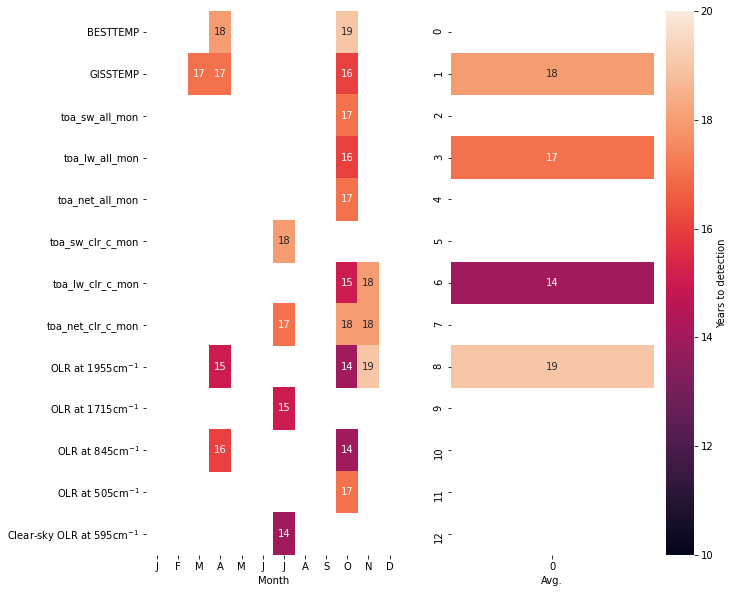

In [226]:
emerge_comp_fig,emerge_comp_axs = plt.subplots(1,2,figsize=(10,10))


out = sns.heatmap(detect_test_monthly,annot=True,vmin=10,vmax=20,cbar_kws={'label': 'Years to detection'},ax=emerge_comp_axs[0],cbar=False) # fmt="s"

ylabels = ['BESTTEMP','GISSTEMP',
           'toa_sw_all_mon','toa_lw_all_mon','toa_net_all_mon','toa_sw_clr_c_mon','toa_lw_clr_c_mon','toa_net_clr_c_mon',
           'OLR at 1955cm$^{-1}$','OLR at 1715cm$^{-1}$','OLR at 845cm$^{-1}$','OLR at 505cm$^{-1}$','Clear-sky OLR at 595cm$^{-1}$']

out.set_xlabel('Month')
__ = out.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
__ = out.set_yticklabels(ylabels,rotation=0)



out = sns.heatmap(detect_test_ann,annot=True,vmin=10,vmax=20,cbar_kws={'label': 'Years to detection'},ax=emerge_comp_axs[1]) # fmt="s"

out.set_xlabel('Avg.')
# __ = out.set_xticklabels(['Avg.'])
# __ = out.set_yticklabels(ylabels,rotation=0)

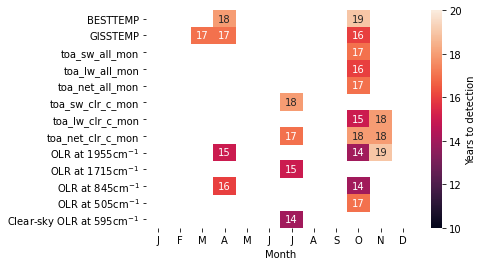

In [201]:
out = sns.heatmap(detect_test_monthly,annot=True,vmin=10,vmax=20,cbar_kws={'label': 'Years to detection'}) # fmt="s"

ylabels = ['BESTTEMP','GISSTEMP',
           'toa_sw_all_mon','toa_lw_all_mon','toa_net_all_mon','toa_sw_clr_c_mon','toa_lw_clr_c_mon','toa_net_clr_c_mon',
           'OLR at 1955cm$^{-1}$','OLR at 1715cm$^{-1}$','OLR at 845cm$^{-1}$','OLR at 505cm$^{-1}$','Clear-sky OLR at 595cm$^{-1}$']

out.set_xlabel('Month')
__ = out.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
__ = out.set_yticklabels(ylabels,rotation=0)

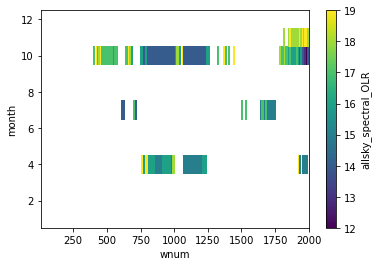

In [153]:
solr_emerge_monthly['allsky_spectral_OLR'].plot()

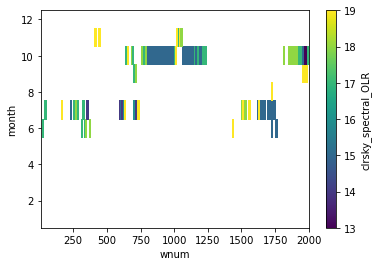

In [164]:
solr_emerge_monthly['clrsky_spectral_OLR'].plot()

[Text(200.0, 1, '50.0'),
 Text(400.0, 1, '25.0'),
 Text(600.0, 1, '16.7'),
 Text(800.0, 1, '12.5'),
 Text(1000.0, 1, '10.0'),
 Text(1200.0, 1, '8.3'),
 Text(1400.0, 1, '7.1'),
 Text(1600.0, 1, '6.2'),
 Text(1800.0, 1, '5.6'),
 Text(2000.0, 1, '5.0'),
 Text(2200.0, 1, '4.5')]

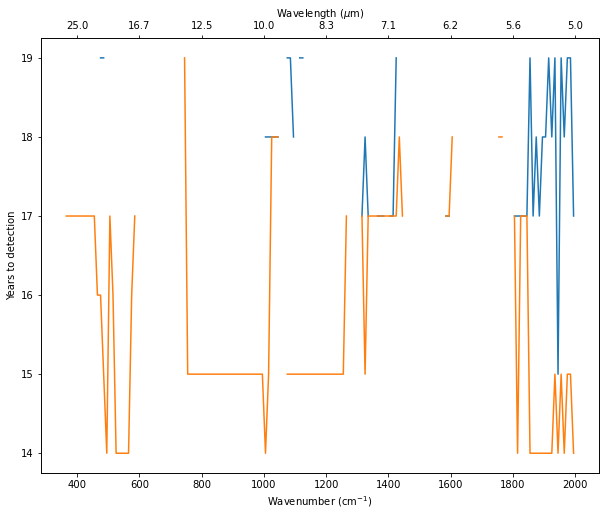

In [101]:
solr_fig,solr_ax = plt.subplots(1,1,figsize=(10,8))

solr_ax.plot(solr_emerge_ann['allsky_spectral_OLR'].wnum,solr_emerge_ann['allsky_spectral_OLR'])
solr_ax.plot(solr_emerge_ann['clrsky_spectral_OLR'].wnum,solr_emerge_ann['clrsky_spectral_OLR'])

solr_ax.set_ylabel('Years to detection')
solr_ax.set_xlabel('Wavenumber (cm$^{-1}$)')

solr_ax_b = solr_ax.twiny()
solr_ax_b.set_xlabel('Wavelength ($\mu$m)')

ax1Ticks = solr_ax.get_xticks()   
ax2Ticks = ax1Ticks

solr_ax_b.set_xticks(ax2Ticks)
solr_ax_b.set_xbound(solr_ax.get_xbound())
solr_ax_b.set_xticklabels(tick_function2(ax2Ticks))


In [135]:
ceres_toa_stddev_monthly.sel(duration=19)['toa_sw_all_mon']

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.01488579, 0.14231734, 0.97512278, 1.49077128, 2.33730359,
       6.3474007 , 6.08156488, 3.09305898, 1.48696075, 0.52563642,
       0.05037955, 0.        ])
Coordinates:
    duration  int64 19
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

There is more variability in the summer when the trends are largest.

In [134]:
ceres_toa_tauvar_monthly['toa_sw_all_mon'].sel(duration=19)

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.86328785, 1.16934704, 0.84358126, 1.08011725, 1.06652654,
       0.9933789 , 1.09492334, 1.47331166, 1.61927929, 2.78094115,
       1.23728423,        nan])
Coordinates:
    duration  int64 19
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

This is interesting, there is more memory in the fall and winter, but estimating $\tau_{var} = 1$ isn't a bad guess.

In [ ]:
DeltaT

In [35]:
detect_shawT_ds = shawT_ds < shawT_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_ds.duration.broadcast_like(detect_shawT_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_ds = 1 + duration_broad.where(~detect_shawT_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_ds = xr.where(emergence_shawT_ds > 50,np.nan,emergence_shawT_ds)

In [36]:
detect_shawT_monthly_ds = shawT_monthly_ds < shawT_monthly_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_monthly_ds.duration.broadcast_like(detect_shawT_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_monthly_ds = 1 + duration_broad.where(~detect_shawT_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)
# emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)

In [34]:
# compute delta-t, the time-to-detection from Leroy et al. (2008)
# $$ \hat{\Delta t} = \min \left(e^{2\sqrt{Var(\tau_{var})}} \left[ \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right] ^{1/3} < t \right) $$

shawT_dict = {}
shawT_monthly_dict = {}

s = 2 # SNR is two (two standard deviations gives a 95% confidence interval)

for _var in ens_vars:
    print(_var)
    # Grab the stored values for the appropriate variable
    # _slope_low     = lens_bounds_dur_ds[_var].sel(bound=0)
    # _slope_high    = lens_bounds_dur_ds[_var].sel(bound=1)
    _slope_median  = lens_bounds_dur_ds[_var].sel(bound=2)
    _stddev = _sigmaN_dict[_var]
    _tauvar = _tauvar_dict[_var]
    
    # _deltaT_low    = (12*s**2 * _stddev**2 * _tauvar / _slope_low**2)**(1/3) # time calculated using a correlation time from the summing method    
    # _deltaT_high   = (12*s**2 * _stddev**2 * _tauvar / _slope_high**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_median = (12*s**2 * _stddev**2 * _tauvar / _slope_median**2)**(1/3) # time calculated using a correlation time from the summing method    
    
    # recombine
    _deltaT_all = xr.merge([_deltaT_low.assign_coords({'bound':0}).expand_dims('bound',axis=1),
                            _deltaT_high.assign_coords({'bound':1}).expand_dims('bound',axis=1),
                            _deltaT_median.assign_coords({'bound':2}).expand_dims('bound',axis=1)]
                          )
    # _deltaT_all = xr.merge([_deltaT_low.assign_coords({'bound':2.5}).expand_dims('bound',axis=1),
    #                         _deltaT_high.assign_coords({'bound':97.5}).expand_dims('bound',axis=1),
    #                         _deltaT_median.assign_coords({'bound':50}).expand_dims('bound',axis=1)]
    #                       )
    
    shawT_dict[_var] = _deltaT_all
    
################### Do for monthly values
    _slope_low_monthly     = lens_bounds_monthly_dur_ds[_var].sel(bound=0)
    _slope_high_monthly    = lens_bounds_monthly_dur_ds[_var].sel(bound=1)
    _slope_median_monthly  = lens_bounds_monthly_dur_ds[_var].sel(bound=2)
    _stddevs_monthly = stddev_monthly_ds[_var]
    _tauvar_monthly  = tauvar_monthly_ds[_var]
    
    _deltaT_low_monthly    = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_low_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_high_monthly   = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_high_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    _deltaT_median_monthly = (12*s**2 * _stddevs_monthly**2 * _tauvar_monthly / _slope_median_monthly**2)**(1/3) # time calculated using a correlation time from the summing method    
    
    # recombine
    _deltaT_monthly_all = xr.merge([_deltaT_low_monthly.assign_coords({'bound':0}).expand_dims('bound',axis=1),
                            _deltaT_high_monthly.assign_coords({'bound':1}).expand_dims('bound',axis=1),
                            _deltaT_median_monthly.assign_coords({'bound':2}).expand_dims('bound',axis=1)]
                          )
    # _deltaT_monthly_all = xr.merge([_deltaT_low_monthly.assign_coords({'bound':2.5}).expand_dims('bound',axis=1),
    #                         _deltaT_high_monthly.assign_coords({'bound':97.5}).expand_dims('bound',axis=1),
    #                         _deltaT_median_monthly.assign_coords({'bound':50}).expand_dims('bound',axis=1)]
    #                       )
    
    shawT_monthly_dict[_var] = _deltaT_monthly_all
        
shawT_ds = xr.merge(shawT_dict.values())
shawT_monthly_ds = xr.merge(shawT_monthly_dict.values())

FLUT
FLUTC
TS
ICEFRAC
TMQ
FSNTOA
FSNTOAC
FSNS
FSNSC


In [35]:
detect_shawT_ds = shawT_ds < shawT_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_ds.duration.broadcast_like(detect_shawT_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_ds = 1 + duration_broad.where(~detect_shawT_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_ds = xr.where(emergence_shawT_ds > 50,np.nan,emergence_shawT_ds)

In [36]:
detect_shawT_monthly_ds = shawT_monthly_ds < shawT_monthly_ds.duration
# We first take the duration and broadcast it across variables and months.
duration_broad = detect_shawT_monthly_ds.duration.broadcast_like(detect_shawT_monthly_ds)
# Then we select the gridcells where detection did not occur. Emergence is one year after the last year where detection did not occur (maximum duration of non-detections.
emergence_shawT_monthly_ds = 1 + duration_broad.where(~detect_shawT_monthly_ds).max(dim='duration')
# Fill areas where emergence did not occur with nans
emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)
# emergence_shawT_monthly_ds = xr.where(emergence_shawT_monthly_ds > 50,np.nan,emergence_shawT_monthly_ds)

In [62]:
ceres_toa_vartauvar_ann_test = 2*ceres_toa_stddev_ann**2 / ceres_toa_stddev_ann['duration']

ceres_toa_vartauvar_monthly_test = 2*ceres_toa_stddev_monthly**2 / ceres_toa_stddev_monthly['duration']

In [65]:
ceres_toa_vartauvar_ann = calc_vartauvar_by_dur(ceres_toa_stddev_ann)
ceres_toa_vartauvar_monthly = calc_vartauvar_by_dur(ceres_toa_stddev_monthly)

In [68]:
np.all(ceres_toa_vartauvar_ann == ceres_toa_vartauvar_ann_test)

<xarray.Dataset>
Dimensions:            ()
Data variables:
    toa_sw_all_mon     bool True
    toa_lw_all_mon     bool True
    toa_net_all_mon    bool True
    toa_sw_clr_c_mon   bool True
    toa_lw_clr_c_mon   bool True
    toa_net_clr_c_mon  bool True
    solar_mon          bool True

In [ ]:
ceres_toa_vartoa

In [60]:
np.sqrt(ceres_toa_vartauvar_monthly['toa_sw_all_mon'].sel(duration=12))

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.0062469 , 0.05126559, 0.28799883, 0.40843779, 0.83881674,
       2.80135643, 2.28919373, 1.32043497, 0.62203858, 0.18635184,
       0.02009488, 0.        ])
Coordinates:
    duration  int64 12
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [61]:
ceres_toa_stddev_monthly['toa_sw_all_mon'].sel(duration=12) / np.sqrt(6)

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.0062469 , 0.05126559, 0.28799883, 0.40843779, 0.83881674,
       2.80135643, 2.28919373, 1.32043497, 0.62203858, 0.18635184,
       0.02009488, 0.        ])
Coordinates:
    duration  int64 12
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Since we are using the Leroy formulation that uses the correlation time $\tau$ instead of $\phi$, we repeat the methods of Weatherhead (applying the $\delta$ method after shifting to the $\log \Delta t$ scale). This approach can be summarized as:  

$$ \tilde{V} \equiv \left( \frac{d \log \Delta t (\tau)}{d \tau} \right)^2 \times Var({\hat{\tau}}), $$

where $Var({\hat{\tau}})$ is the variance of $\tau$ due to the finite observational period, and $\Delta t$ has the form

$$ \Delta t = \left( \frac{12s^2}{m_{est}^2} \sigma_{var}^2 \tau_{var} \right) ^{1/3} $$

Empirically, let 

$$ Var(m_{est}) = \frac{2m_{est}^2}{M}, $$

so that the standard deviation of $m_{est}$ is 

$$ \sigma_{m_{est}} = \sqrt{\frac{2}{M}} m_{est} $$

## Old Code

In [70]:
annavg_slopes_dict = {}
monthly_slopes_dict = {}

for _var in ceres_toa_tsel.data_vars:    
    ens_tseries = ceres_toa_tsel[_var] # select your variable
    
    # turn into annual tseries, need to sub-select by year because we don't have a full year at the beginning or end of the timeseries
    ens_tseries_ann = ens_tseries.sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time')
    
    lens_slopes_dict = {}
    lens_slopes_monthly_dict = {}
    for _dur in durations: # iterate over possible detection durations 
        # print(_dur)
        tseries_dur_subset = ens_tseries_ann.isel(year=slice(None,_dur)) # subset the annual resolution data in time
        tseries_dur_monthly_subset = ens_tseries.isel(time=slice(None,12*_dur)) # subset the monthly resolution data in time

        _lens_polyfit = tseries_dur_subset.polyfit(dim='year',deg=1) # take a linear fit
        _lens_slopes = _lens_polyfit['polyfit_coefficients'].sel(degree=1).values # pull out the slope from the linear fit

        _lens_polyfit_monthly = tseries_dur_monthly_subset.groupby('time.month').map(linear_polyfit)
        _lens_slopes_monthly  = _lens_polyfit_monthly['polyfit_coefficients'].sel(degree=1).values

        lens_slopes_dict[_dur] = _lens_slopes # save slopes in an inner dictionary
        lens_slopes_monthly_dict[_dur] = _lens_slopes_monthly

    # shift the data to an xarray object so future operations do not require iteration
    _temp_slopes_da = xr.DataArray(
        data=list(lens_slopes_dict.values()),
        dims=["duration"],
        coords=dict(
            duration=(durations),
        ),
        name = _var
    )
    
    _temp_slopes_monthly_da = xr.DataArray(
        data=np.stack(list(lens_slopes_monthly_dict.values()),axis=1),
        dims=["month", "duration"],
        coords=dict(
            duration=(durations),
            month=np.arange(1,13,1),
        ),
        name = _var
    )
    
    annavg_slopes_dict[_var] = _temp_slopes_da
    monthly_slopes_dict[_var] = _temp_slopes_monthly_da
    
    del lens_slopes_dict,lens_slopes_monthly_dict
                
ceres_toa_slopes_dur_ds = xr.merge(annavg_slopes_dict.values())
ceres_toa_slopes_monthly_dur_ds = xr.merge(monthly_slopes_dict.values())

del annavg_slopes_dict,monthly_slopes_dict

In [475]:
# this bullshit roundabout method is the bastard child of this shittastic stackoverflow page: 
# https://stackoverflow.com/questions/63082479/how-to-replace-the-current-dimension-of-an-xarray-object-with-two-new-ones

_var = 'allsky_spectral_OLR'

# We want to reshape the wavenumber X time structure into a wavenumber X month X year structure, but xarray doesn't want to go easily
# Add new year and month coordinates
tseries_dur_monthly_subset_newcoords = tseries_dur_monthly_subset.assign_coords(
    {
        'year' :tseries_dur_monthly_subset['time.year'],
        'month':tseries_dur_monthly_subset['time.month'],
    }
)

# Destroy all hierarchy in the data by sending to pandas and hard-reseting the indices.
# Finally, set the indices to our chosen year X month X wavenumber and return to xarray
tseries_dur_monthly_subset_reorg = tseries_dur_monthly_subset_newcoords.to_dataframe().reset_index().set_index(['year','month','wnum']).to_xarray() 

non_year_dims = list(tseries_dur_monthly_subset_reorg.dims)
non_year_dims.remove('year') # drop the time dim

monthly_data_stacked = tseries_dur_monthly_subset_reorg.stack(temp_index=non_year_dims)
monthly_data_stacked = monthly_data_stacked[_var] #.to_array()
monthly_tau_var = monthly_data_stacked.groupby('temp_index',restore_coord_dims=True).map(calc_tauvar_wrapper).unstack()

In [20]:
_tauvar_dict = {}
_tauvar_monthly_list   = []


for _var in ens_vars:
    print(_var)
    _tauvar_dict[_var] = calc_tauvar(_autocorr_dict[_var],verbose=False)
    
    _monthly_tauvars = cesm1_pic_ds[_var].groupby('time.month').map(calc_tauvar_wrapper) # this calculates the autocorr on its way to tauvar, so its fine
    _monthly_tauvars.name = _var # assign the correct name for future concatenation
    
    _tauvar_monthly_list.append(_monthly_tauvars)
    
tauvar_monthly_ds = xr.merge(_tauvar_monthly_list) # FSNTOA December tauvar is None, good job code!

FLUT
FLUTC
TS
ICEFRAC
TMQ
FSNTOA
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNTOAC
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNS
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.
FSNSC
Midpoint of 'autocorrelation_data' is not 1. Check that data is symmetric and normalized.


In [39]:
ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2018-12-31')).groupby('time.month').std(dim='time')

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.01536503, 0.12403939, 0.67033573, 1.12991034, 2.13614449,
       6.3332165 , 6.00769549, 3.08345568, 1.45120878, 0.52401844,
       0.05051568, 0.        ])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [34]:
ceres_toa_stddev_ann['toa_sw_all_mon']

<xarray.DataArray 'toa_sw_all_mon' (duration: 18)>
array([0.18746011, 0.83541664, 0.72735296, 1.34759338, 1.3588213 ,
       1.25974886, 1.22681808, 1.38016566, 1.46423816, 1.42708313,
       1.42683275, 1.42376336, 1.43828542, 1.4322631 , 1.41505046,
       1.45205316, 1.43298709, 1.43298709])
Coordinates:
  * duration  (duration) int64 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [41]:
ceres_toa_stddev_monthly['toa_sw_all_mon'].sel(duration=16)

<xarray.DataArray 'toa_sw_all_mon' (month: 12)>
array([0.01536503, 0.12403939, 0.67033573, 1.12991034, 2.13614449,
       6.3332165 , 6.00769549, 3.08345568, 1.45120878, 0.52401844,
       0.05051568, 0.        ])
Coordinates:
    duration  int64 16
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

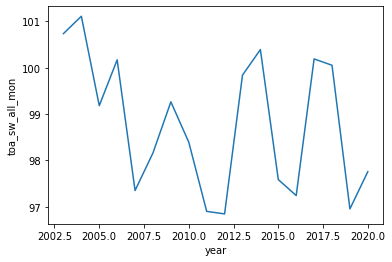

In [157]:
ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time').plot()

In [155]:
years = np.arange(2003,2021)

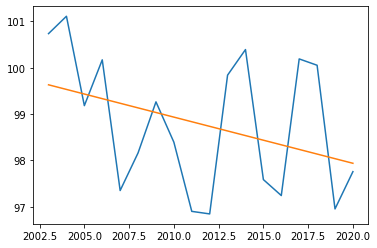

In [172]:
plt.plot(years,ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time'))

plt.plot(years,ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=1,duration=19).values*years + ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=0,duration=19).values,label='fit')

In [179]:
(ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=1,duration=19).values*years + ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=0,duration=19).values)

array([99.63250868, 99.53286305, 99.43321741, 99.33357177, 99.23392613,
       99.13428049, 99.03463486, 98.93498922, 98.83534358, 98.73569794,
       98.63605231, 98.53640667, 98.43676103, 98.33711539, 98.23746975,
       98.13782412, 98.03817848, 97.93853284])

In [185]:
np.std(ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time').values)

1.4329870894616255

In [181]:
(ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time').values - (ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=1,duration=19).values*years + ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=0,duration=19).values)).std()

1.3364840447544049

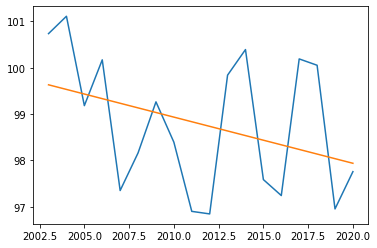

In [172]:
plt.plot(years,ceres_toa_tsel['toa_sw_all_mon'].sel(time=slice('2003-01-01','2020-12-31')).groupby('time.year').mean('time'))

plt.plot(years,ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=1,duration=19).values*years + ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=0,duration=19).values,label='fit')

In [190]:
ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=1,duration=19).values*years + ceres_toa_slopes_dur_ds['toa_sw_all_mon'].sel(degree=0,duration=19).values

array([99.63250868, 99.53286305, 99.43321741, 99.33357177, 99.23392613,
       99.13428049, 99.03463486, 98.93498922, 98.83534358, 98.73569794,
       98.63605231, 98.53640667, 98.43676103, 98.33711539, 98.23746975,
       98.13782412, 98.03817848, 97.93853284])